In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sunspot Data
## American Association of Variable Star Observers (AAVSO) American Relative Sunspot Numbers (Ra)

In [24]:
#Monthly occurrences of sunspots from 1944 to 2021
monthly_spots = pd.read_csv('monthly_spots.csv')
#Converting separate Year and Month columns to strings and combining them
monthly_spots['Date'] = monthly_spots['Year'].astype(str) + ' ' + monthly_spots['Month'].astype(str)
#Dropping old columns to leave only Date column
monthly_spots = monthly_spots.drop(columns=['Year', 'Month'])
#Reordering columns
monthly_spots = monthly_spots[['Date', 'Ra']]
#Converting Date column to 'datetime' data type
monthly_spots['Date'] = pd.to_datetime(monthly_spots['Date']).dt.strftime('%Y-%m')
#Setting Date as index
monthly_spots.set_index('Date', inplace=True)
monthly_spots

,Ra
Date,
1944-12,31.2
1945-01,18.5
1945-02,11.8
1945-03,19.7
1945-04,31.6
...,...
2021-06,19.9
2021-07,23.8
2021-08,15.7


In [26]:
#Daily occurrences of sunspots from 1945 to 2021
daily_spots = pd.read_csv('daily_spots.csv')
#Converting separate Year, Month and Day columns to strings and combining them
daily_spots['Date'] = daily_spots['Year'].astype(str) + ' ' + daily_spots['Month'].astype(str) + ' ' + daily_spots['Day'].astype(str)
#Dropping old columns to leave only Date column
daily_spots = daily_spots.drop(columns=['Year', 'Month', 'Day'])
#Reodering columns
daily_spots = daily_spots[['Date', 'Ra']]
#Converting Date columns to 'datetime' datetype
daily_spots['Date'] = pd.to_datetime(daily_spots['Date'], format='%Y-%m-%d')
#Setting Date as index
daily_spots.set_index('Date', inplace=True)
daily_spots

,Ra
Date,
1945-01-01,10
1945-01-02,0
1945-01-03,1
1945-01-04,2
1945-01-05,11
...,...
2021-10-27,70
2021-10-28,67
2021-10-29,57


Text(0, 0.5, 'Ra Value')

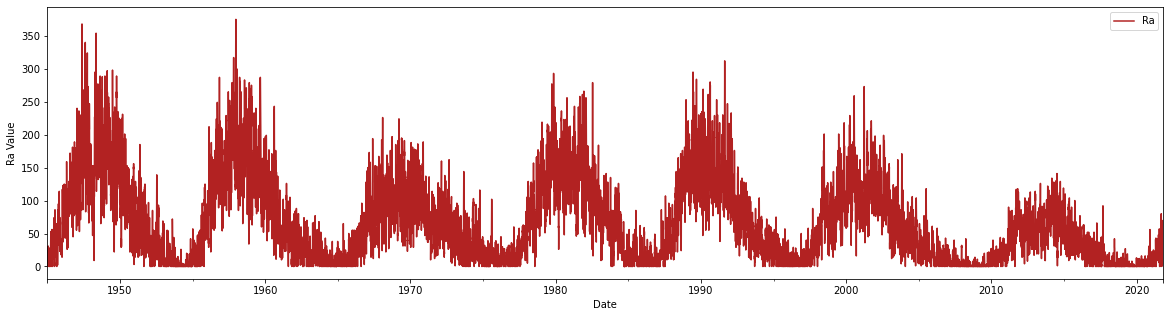

In [28]:
#Daily sunspots plotted
daily_spots.plot(figsize=(20, 5), color='firebrick')
plt.xlabel('Date')
plt.ylabel('Ra Value')

Text(0, 0.5, 'Ra Value')

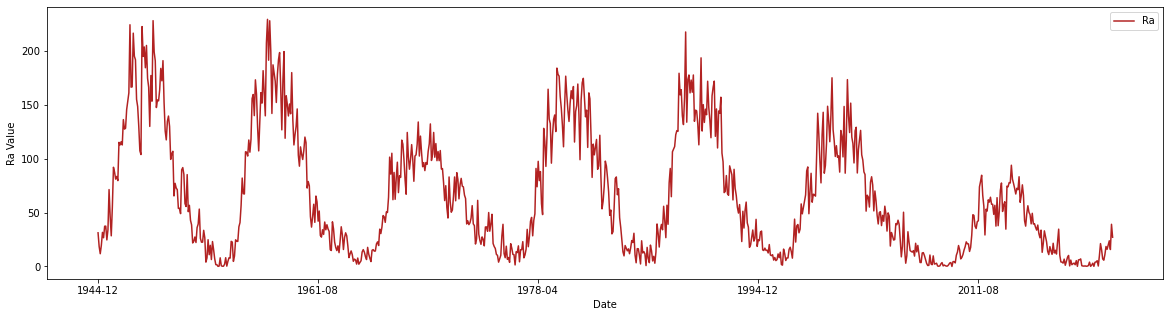

In [27]:
#Monthly sunspots plotted
monthly_spots.plot(figsize=(20, 5), color='firebrick')
plt.xlabel('Date')
plt.ylabel('Ra Value')

## Comparison of both graphs
#### We can clearly see that the graph for Daily Sunspot Occurrences is significantly denser than that of the Monthly Sunspot Occurrences. Since there is significantly more data, the graph becomes denser. 

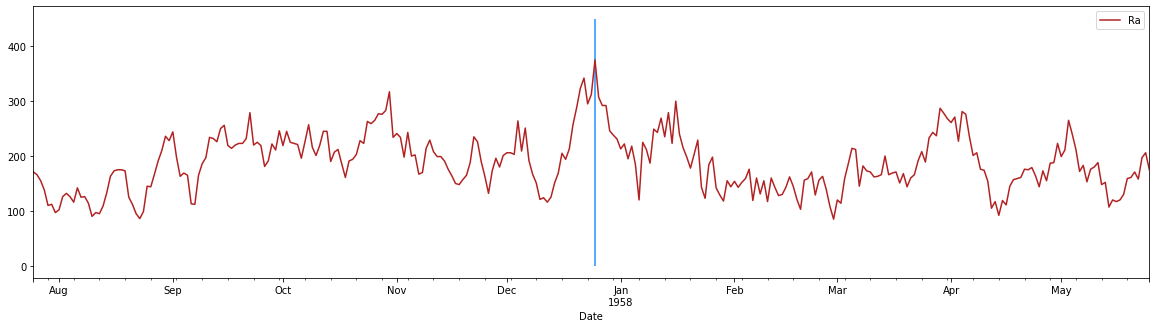

In [29]:
#Showing overall maximum RA value, which occurred on December 12th of 1957 with a value of 375!
ax = daily_spots['1957-07-25':'1958-05-25'].plot(figsize=(20, 5), color='firebrick')
ax.vlines(x=['1957-12-25'], ymin=0, ymax=450, color='dodgerblue', label='test lines')

<AxesSubplot:>

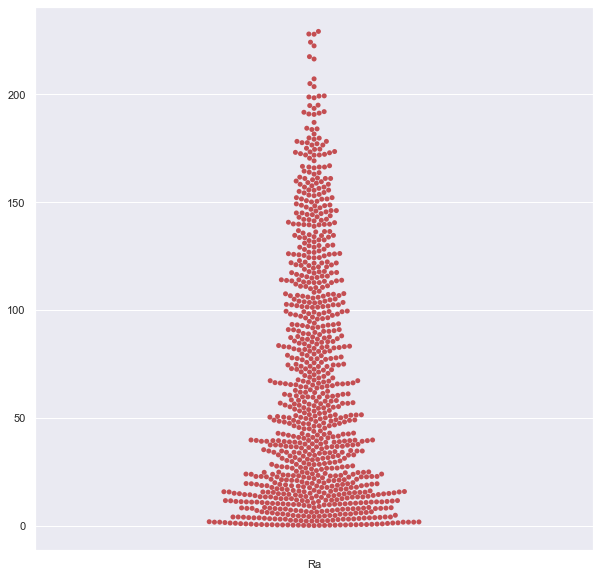

In [30]:
#Here, we can see the data visualized in a swarm plot.

sns.set(rc={'figure.figsize':(10,10)})
sns.swarmplot(data=monthly_spots, palette =['r'])

# Solar Flares
## Flux - The F10.7 Index has proven very valuable in specifying and forecasting space weather. Because it is a long record, it provides climatology of solar activity over six solar cycles.

In [2]:
flux = pd.read_csv('cls_radio_flux_f107.csv')
flux

,time (yyyy MM dd),absolute_f107 (solar flux unit (SFU)),absolute_f107_c (solar flux unit (SFU)),absolute_f107_p (solar flux unit (SFU)),absolute_f107_f,adjusted_f107 (solar flux unit (SFU)),adjusted_f107_c (solar flux unit (SFU)),adjusted_f107_p (solar flux unit (SFU)),adjusted_f107_f
0,1951 11 1,107.3,107.3,3.6,0,105.6,105.6,3.6,0
1,1951 11 2,104.7,104.7,3.6,0,103.0,103.0,3.6,0
2,1951 11 3,106.1,106.1,3.6,2,104.3,104.3,3.6,2
3,1951 11 4,107.2,107.2,3.6,0,105.3,105.3,3.6,0
4,1951 11 5,114.0,114.0,3.6,0,112.0,112.0,3.6,0
...,...,...,...,...,...,...,...,...,...
25595,2021 11 28,92.0,92.0,2.7,1,89.5,89.5,2.6,1
25596,2021 11 29,90.0,90.0,2.7,1,87.5,87.5,2.6,1
25597,2021 11 30,90.0,90.0,2.7,1,87.5,87.5,2.6,1
25598,2021 12 1,86.0,86.0,2.7,1,83.5,83.5,2.6,1


In [3]:
flux = flux.rename(columns={'time (yyyy MM dd)': 'time', 'adjusted_f107 (solar flux unit (SFU))': 'SFU'})
flux = flux.set_index('time')
flux.index = pd.to_datetime(flux.index)
flux

,absolute_f107 (solar flux unit (SFU)),absolute_f107_c (solar flux unit (SFU)),absolute_f107_p (solar flux unit (SFU)),absolute_f107_f,SFU,adjusted_f107_c (solar flux unit (SFU)),adjusted_f107_p (solar flux unit (SFU)),adjusted_f107_f
time,,,,,,,,
1951-11-01,107.3,107.3,3.6,0,105.6,105.6,3.6,0
1951-11-02,104.7,104.7,3.6,0,103.0,103.0,3.6,0
1951-11-03,106.1,106.1,3.6,2,104.3,104.3,3.6,2
1951-11-04,107.2,107.2,3.6,0,105.3,105.3,3.6,0
1951-11-05,114.0,114.0,3.6,0,112.0,112.0,3.6,0
...,...,...,...,...,...,...,...,...
2021-11-28,92.0,92.0,2.7,1,89.5,89.5,2.6,1
2021-11-29,90.0,90.0,2.7,1,87.5,87.5,2.6,1
2021-11-30,90.0,90.0,2.7,1,87.5,87.5,2.6,1


In [4]:
sfu = pd.DataFrame(flux['SFU'])
sfu

,SFU
time,
1951-11-01,105.6
1951-11-02,103.0
1951-11-03,104.3
1951-11-04,105.3
1951-11-05,112.0
...,...
2021-11-28,89.5
2021-11-29,87.5
2021-11-30,87.5


Text(0, 0.5, 'Solar Flux Unit (SFU)')

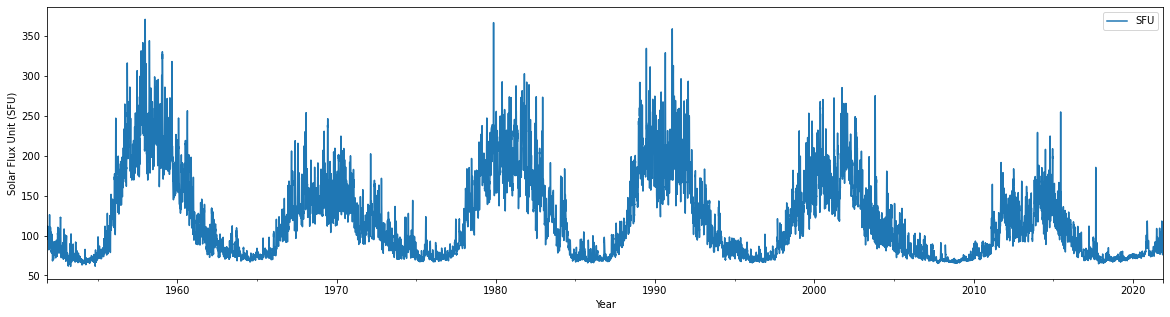

In [5]:
#Daily SFU plotted
sfu.plot(figsize=(20, 5))
plt.xlabel('Year')
plt.ylabel('Solar Flux Unit (SFU)')

# Comparison of SFU to Sunspots
### Here, the graphs from each will be overlayed and compared to one another. 

#### We can immediately tell there there is a strong corellation between SFU and Ra, as both are interconected in their nature. 

<AxesSubplot:xlabel='Date'>

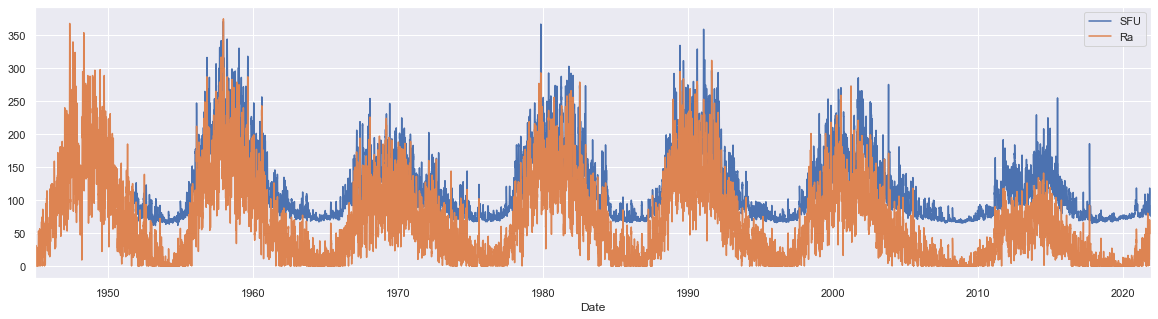

In [31]:
ax = sfu.plot()
daily_spots.plot(ax=ax, figsize=(20, 5))

Text(0, 0.5, 'Solar Flux Unit (SFU)')

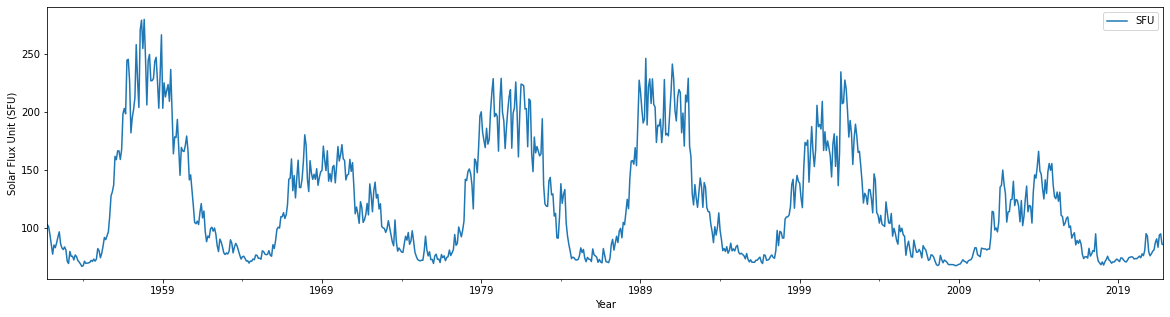

In [6]:
#Monthly SFU plotted
monthlyflux = sfu.resample('M', closed='left', label='left').mean()
monthlyflux.plot(figsize=(20, 5))
plt.xlabel('Year')
plt.ylabel('Solar Flux Unit (SFU)')

Text(0, 0.5, 'Solar Flux Unit (SFU)')

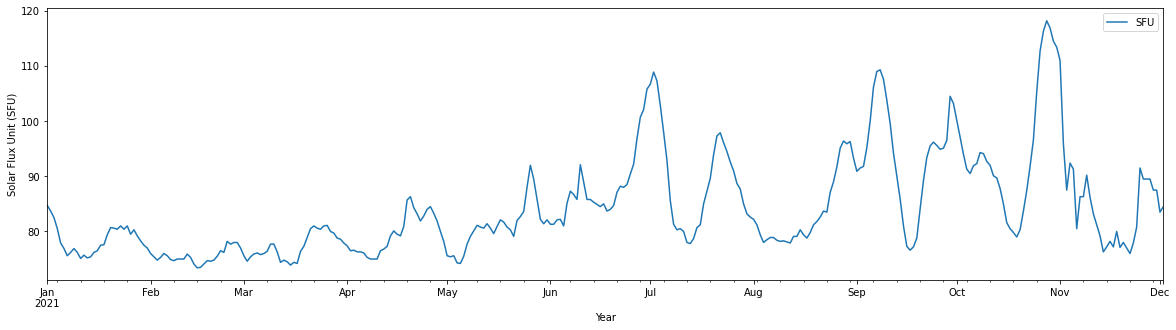

In [7]:
#Window of 2021, Jan - Nov
sfu['2021-01-01':'2021-12-03'].plot(figsize=(20, 5))
plt.xlabel("Year")
plt.ylabel("Solar Flux Unit (SFU)")

In [8]:
#Date with the highest flux in 2021
sfu['2021-01-01':'2021-12-03'].idxmax()

SFU   2021-10-28
dtype: datetime64[ns]

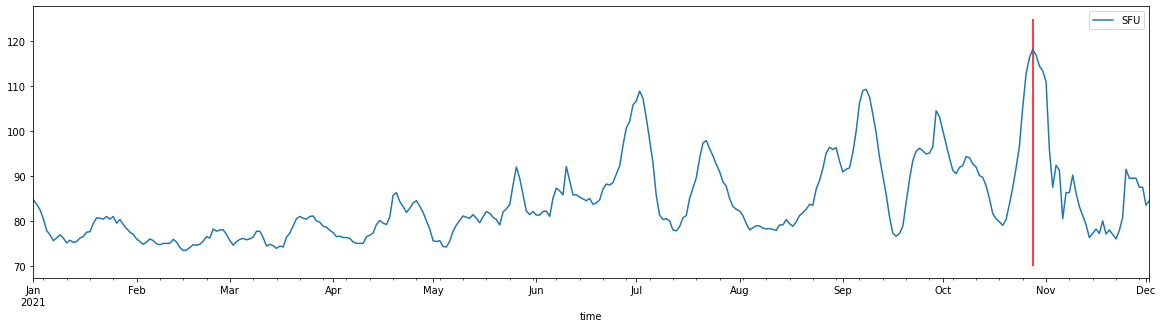

In [9]:
ax = sfu['2021-01-01':'2021-12-03'].plot(figsize=(20, 5))
ax.vlines(x=['2021-10-28'], ymin=70, ymax=125, color='r', label='test lines')

In [10]:
#All NOAA flare files from 1997-2017 go into one list, allFlares
year=1997
allFlares=[]
for i in range(20):
    file = open("goes-xrs-report_"+str(year)+".txt", "r")
    sat_data = file.read()
    sat_entry = sat_data.splitlines()
    #removing empty lines
    for j in sat_entry:
        if not j:
            sat_entry.remove(j)
    #prints the first line of every file... for testing purposes
    #note - "G15" == "GOES"
    print(sat_data[:80])
    allFlares.append(sat_entry)
    file.close()
    year+=1

31777970105  1331 1610 1445                                A 6     GOES 4.3E-04 
31777980101  0120 0139 0134 S22W69SF                       C 18    GOES 9.8E-04 
31777990101  0021 0047 0031                                M 11    GOES 1.3E-02 
31777000101  0001 0014 0008                                C 17    GOES 8.0E-04 
31777010101  0007 0020 0013                                C 12    GOES 8.1E-04 
31777020101  0859 0917 0910                                C 45    GOES 3.8E-03

31777030101  0749 0759 0753 N19W22SF                       B 33    GOES 1.7E-04 
31777040101  0122 0141 0133                                C 40    GOES 3.5E-03 
31777050101  0001 0039 0031 N06E34SXI                      X 17    GOES 9.2E-02 
31777060101  2141 2300 2216 N16W90SXI                      C 15    GOES 5.3E-03 
31777070101  1751 1800 1755                                B 13    GOES 6.2E-05 
31777080101  0007 0037 0026                                B 70    GOES 9.1E-04 
31777090109  2358 0005 0003 

In [11]:
#dataframe that will hold allFlares info
df = pd.DataFrame({'date': [],
                   'start time': [],
                   'end time': [],
                   'max time': [],
                   'latitude of xray flare': [],
                   'longitude of xray flare': [],
                   'class': [],
                   'Integrated flux (units = J/m**2)': [],
                   'NOAA AR':[]})

In [12]:
#Function to append the century to avoid conversion errors when using pd.to_datetime
#ex. "97" becomes "1997"
def get_century(i):
    if(i<3):
        return '19'
    else:
        return '20'

In [13]:
#populating df
#takes ~ 2 minutes to compile
prefix=0
for year in allFlares:
    for entry in year:
        s=pd.Series([(get_century(prefix)+entry[5:11]), entry[12:17], 
                     entry[18:22], entry[23:27], entry[28:31], 
                     entry[31:34], entry[59:63], entry[72:79], 
                     entry[80:85]], 
                     index=['date','start time','end time','max time','latitude of xray flare','longitude of xray flare','class','Integrated flux (units = J/m**2)','NOAA AR'])
        df = df.append(s, ignore_index=True)
    prefix+=1

print(len(df))

36091


In [14]:
#reindexing & turning the 'date' column to datetime
df = df.set_index('date')
df.index = pd.to_datetime(df.index)
df

,start time,end time,max time,latitude of xray flare,longitude of xray flare,class,Integrated flux (units = J/m**2),NOAA AR
date,,,,,,,,
1997-01-05,1331,1610,1445,,,A 6,4.3E-04,
1997-01-07,0835,0843,0840,S01,W38,A 7,1.5E-05,8009
1997-01-16,1602,1611,1605,,,B 11,4.1E-05,
1997-01-16,2213,2213,2213,,,A 50,,
1997-01-19,0954,1012,0957,,,A 81,9.5E-06,
...,...,...,...,...,...,...,...,...
2016-12-29,2011,2020,2015,,,B 13,4.9E-05,
2016-12-30,0130,0136,0133,,,B 10,2.2E-05,
2016-12-30,1222,1239,1229,,,B 22,1.7E-04,


In [15]:
#example
#input: X22
#returns X

def get_class(exp):
    return exp[0]

In [16]:
fclass = []
fclass = df['class'].apply(get_class)\
    .to_frame()
fclass

,class
date,
1997-01-05,A
1997-01-07,A
1997-01-16,B
1997-01-16,A
1997-01-19,A
...,...
2016-12-29,B
2016-12-30,B
2016-12-30,B


In [17]:
#Reformatting fclass and pivotting it to see the counts of each flare occurrence every day
flarecount_day = fclass['class'].groupby(fclass.index).value_counts()\
    .to_frame()\
    .rename(columns={'class':'count'})\
    .reset_index()\
    .set_index('date')
flarecount_day= flarecount_day.pivot_table('count', index=flarecount_day.index, columns='class', fill_value=0)\
    .resample('D', closed='right', label='right').sum()
flarecount_day

class,A,B,C,M,X
date,,,,,
1997-01-05,1,0,0,0,0
1997-01-06,0,0,0,0,0
1997-01-07,1,0,0,0,0
1997-01-08,0,0,0,0,0
1997-01-09,0,0,0,0,0
...,...,...,...,...,...
2016-12-27,0,3,0,0,0
2016-12-28,0,0,0,0,0
2016-12-29,0,1,0,0,0


In [18]:
#resampling to monthly sum of each flare class
flarecount_month = flarecount_day.resample('M', closed='right', label='right').sum()
flarecount_month

class,A,B,C,M,X
date,,,,,
1997-01-31,4,6,0,0,0
1997-02-28,0,49,6,0,0
1997-03-31,0,44,2,0,0
1997-04-30,0,78,9,1,0
1997-05-31,0,69,6,1,0
...,...,...,...,...,...
2016-08-31,0,69,27,1,0
2016-09-30,0,93,8,0,0
2016-10-31,0,50,4,0,0


In [19]:
flarecount_year = flarecount_day.resample('Y', closed='right', label='right').sum()
flarecount_year = flarecount_year.set_index(flarecount_year.index.year) 
flarecount_year[['C','M','X']]

class,C,M,X
date,,,
1997,286,21,3
1998,1188,94,14
1999,1854,170,4
2000,2263,215,17
2001,2101,310,21
2002,2323,219,12
2003,1316,160,20
2004,912,122,12
2005,599,103,18


In [35]:
flarecount_year[['C','M','X']].describe()

class,C,M,X
count,20.000000,20.000000,20.000000
mean,1027.450000,106.650000,8.500000
std,785.281342,87.695211,7.437459
min,8.000000,0.000000,0.000000
25%,258.000000,19.750000,1.500000
50%,1194.000000,107.000000,7.500000
75%,1466.250000,162.500000,14.500000
max,2323.000000,310.000000,21.000000


<AxesSubplot:title={'center':'Number of C, M, and X class solar flares per year'}, xlabel='date'>

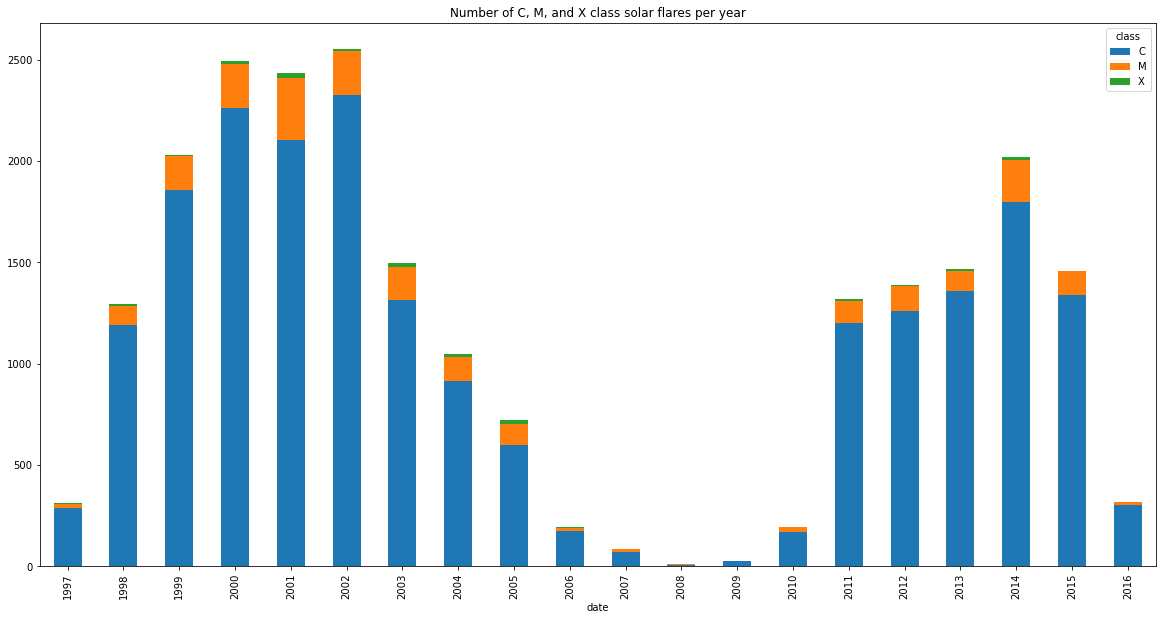

In [20]:
flarecount_year[['C','M','X']].plot.bar(stacked=True, title="Number of C, M, and X class solar flares per year", figsize=(20,10))

Text(0, 0.5, 'Solar Flux Unit (SFU)')

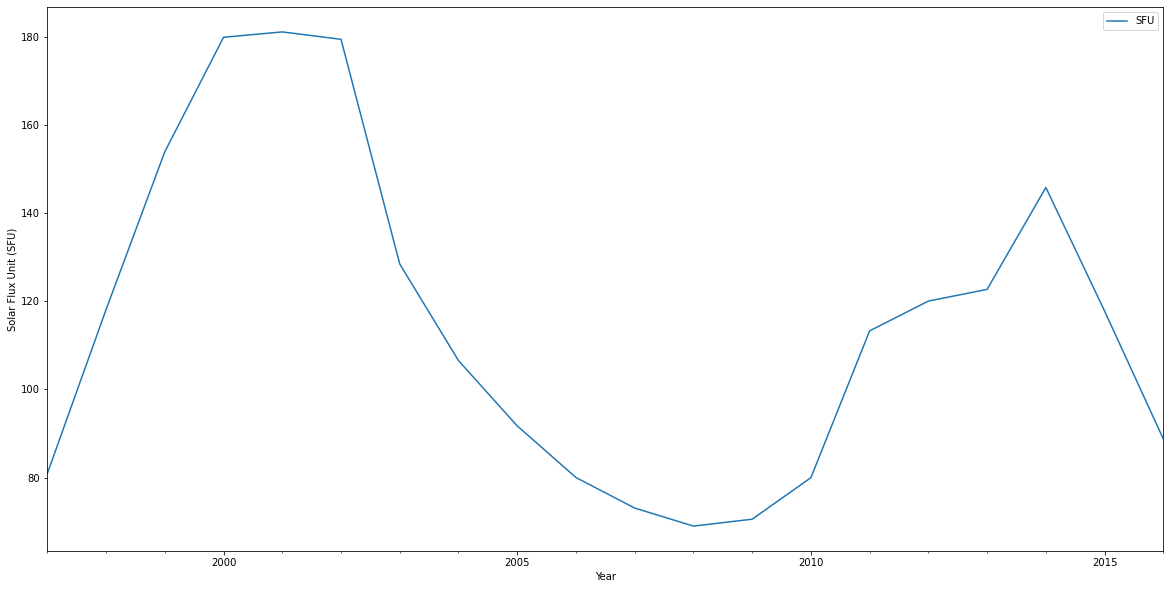

In [21]:
#Window of Jan 1997 - Nov 2016 resampled yearly
yearlyflux = sfu.resample('Y').mean()
yearlyflux['1997':'2016'].plot(figsize=(20, 10))
plt.xlabel("Year")
plt.ylabel("Solar Flux Unit (SFU)")

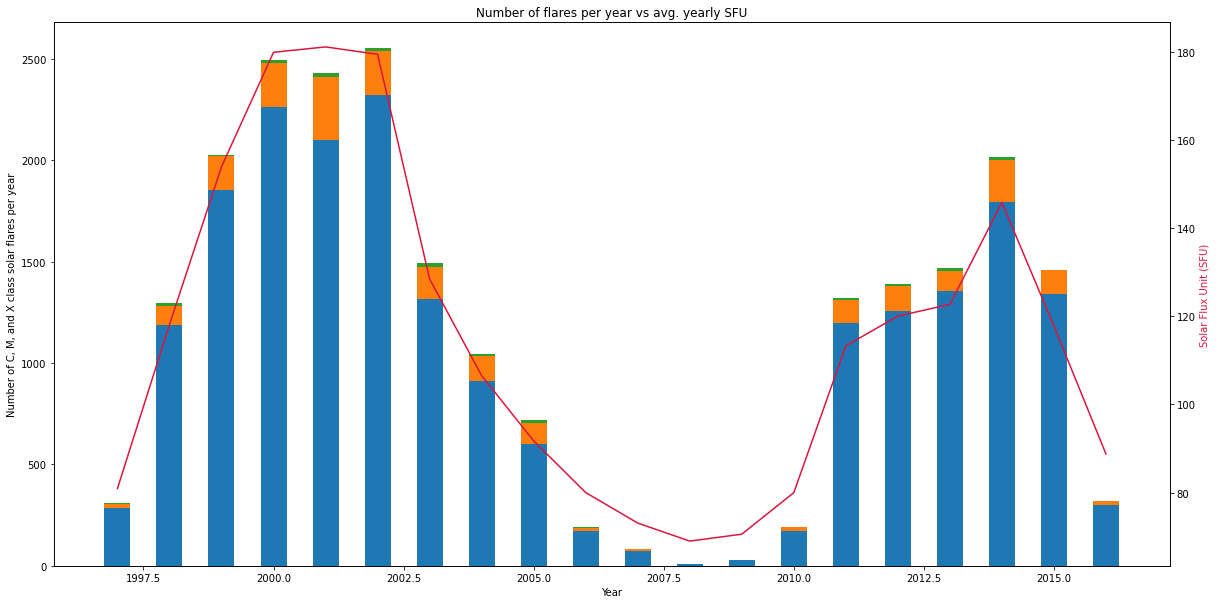

In [22]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_title('Number of flares per year vs avg. yearly SFU')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of C, M, and X class solar flares per year')
ax1.bar(flarecount_year.index, height=flarecount_year['X'], width=.50, bottom=(flarecount_year['M']+flarecount_year['C']), color='#2ca02c')
ax1.bar(flarecount_year.index, height=flarecount_year['M'], width=.50, bottom=flarecount_year['C'], color='#ff7f0e')
ax1.bar(flarecount_year.index, height=flarecount_year['C'], width=.50, color = '#1f77b4')


ax2 = ax1.twinx()  # share the x-axis, new y-axis
color = 'crimson'
ax2.set_ylabel('Solar Flux Unit (SFU)', color=color)
ax2.plot(flarecount_year.index, yearlyflux['1997':'2016'], color=color)

plt.show()
#credit: https://benalexkeen.com/bar-charts-in-matplotlib/

# Conclusion
## Strong correlations between yearly sunspot count, recorded solar radio flux, and solar flare count.